In [1]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [3]:
# 数据准备
df_model = pd.read_csv("london_model_with_poi.csv")
print(df_model.head())

   LSOA_Code  Year  Vulnerable_Ratio  Population_Density  House_Price  \
0  E01000006  2015          0.325557        13158.253752     196125.0   
1  E01000006  2016          0.319872        12837.653479     349062.5   
2  E01000006  2017          0.322894        12633.015007     408500.0   
3  E01000006  2018          0.329176        12578.444748     379375.0   
4  E01000006  2019          0.315076        12578.444748     247375.0   

   Theft_Rate_per1k  Income_Score_rate  Employment_Score_rate  \
0          1.555210              0.117                  0.059   
1          4.250797              0.117                  0.059   
2          4.859611              0.117                  0.059   
3          8.134490              0.117                  0.059   
4          3.253796              0.117                  0.059   

   Education,_Skills_and_Training_Score  \
0                                14.798   
1                                14.798   
2                                14.798  

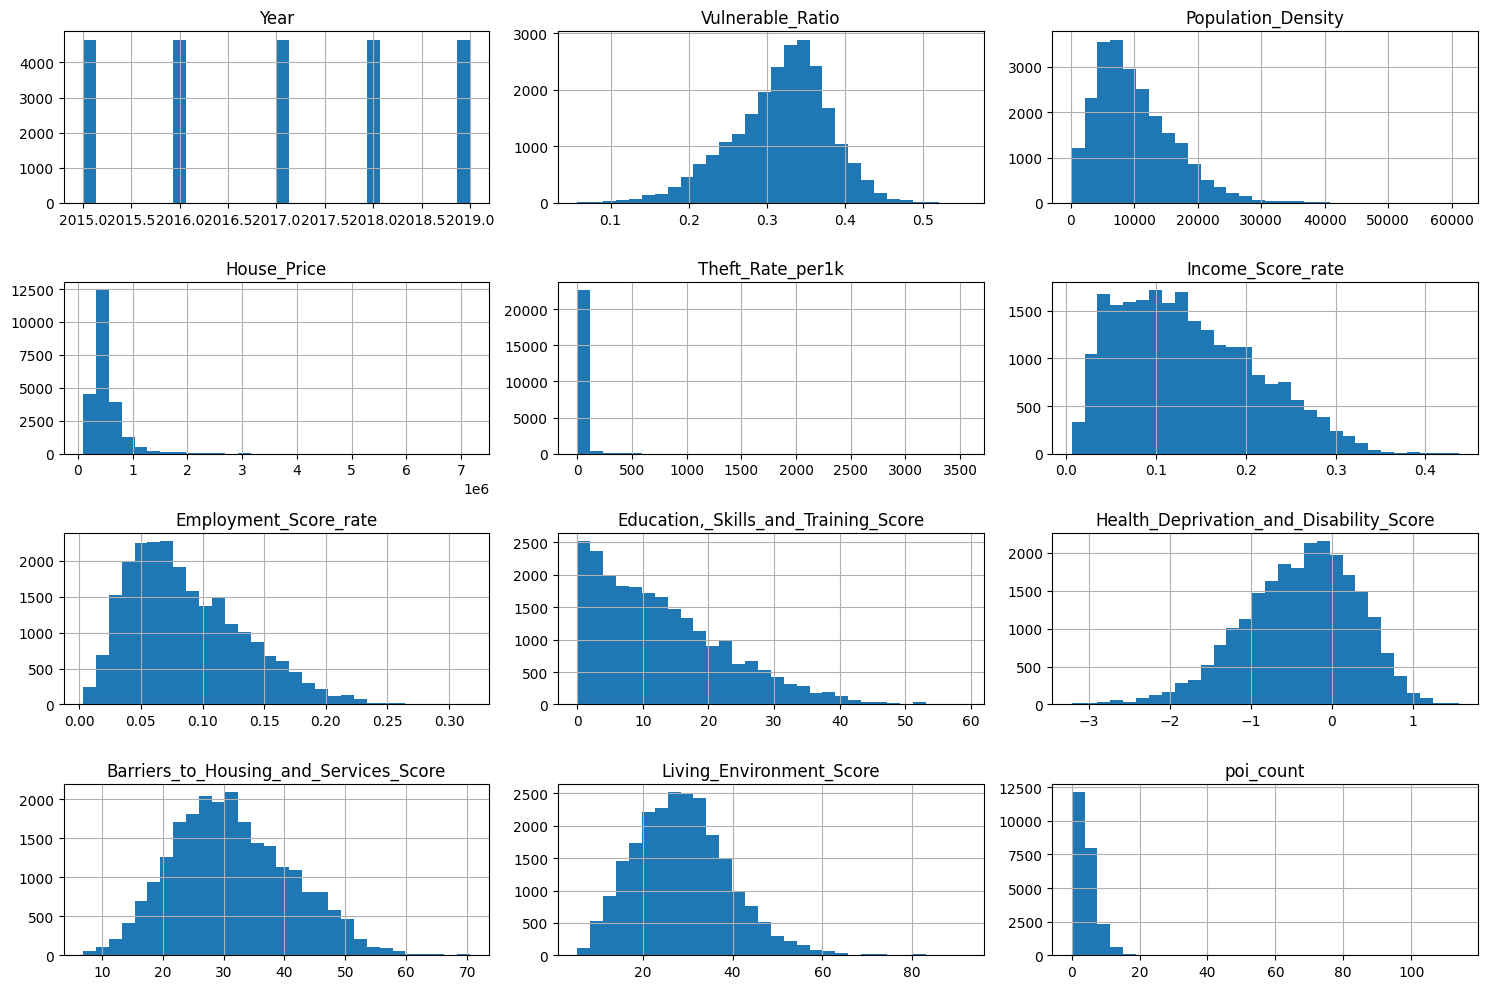

In [4]:
# 直方图
import matplotlib.pyplot as plt
df_model.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

features = df_model.drop(columns=["Theft_Rate_per1k", "LSOA_Code", "Employment_Score_rate"])  # 你要预测的那个记得留出来
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = pd.DataFrame(features_scaled, columns=features.columns)
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                                   feature       VIF
0                                     Year  1.009600
1                         Vulnerable_Ratio  2.059438
2                       Population_Density  1.980567
3                              House_Price  1.570722
4                        Income_Score_rate  4.486879
5     Education,_Skills_and_Training_Score  2.469921
6  Health_Deprivation_and_Disability_Score  3.438506
7   Barriers_to_Housing_and_Services_Score  1.558577
8                 Living_Environment_Score  1.695137
9                                poi_count  1.207461


In [11]:
import statsmodels.api as sm

X = sm.add_constant(X)  # 加常数项
y = df_model["Theft_Rate_per1k"]
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Theft_Rate_per1k   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     659.6
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:30:11   Log-Likelihood:            -1.2910e+05
No. Observations:               23265   AIC:                         2.582e+05
Df Residuals:                   23254   BIC:                         2.583e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------